<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Predict-Restaurant-Revenue/blob/main/EDA%26MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT RESTAURANT REVENUE**

Data Source: https://www.kaggle.com/sanamps/predict-restaurant-revenue

***KPI: Its an assignment task to predict the revenue of restaurant***

author = Hoagonde Amedegnato

email = amereine69@gmail.com

## **I- EXPLORATORY DATA ANALYSIS (EDA)**

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Import Libraries***

In [2]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization 
#Packages related to data visualizaiton
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from matplotlib.backends.backend_pdf import PdfPages
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 

<Figure size 432x216 with 0 Axes>

# ***Load and Read Data***

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Predict Restaurant Revenue/train.csv')
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [4]:
test_df = pd.read_csv('/content/drive/MyDrive/Predict Restaurant Revenue/test.csv')
test_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,1/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,3/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,5/6/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,7/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1/5/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,7/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# ***Examine Data***

In [5]:
# Check the top 10 rows of the dataset using .head() method
train_df.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0


In [6]:
# Check the bottom 10 rows of the dataset using .tail() method
train_df.tail(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
127,127,09/07/2007,Bursa,Other,FC,3,4.0,4.0,4.0,2,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,2,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7592272.0
128,128,10/14/2011,Ankara,Big Cities,FC,2,4.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,2383840.0
129,129,02/08/2007,Eskişehir,Other,FC,4,5.0,5.0,4.0,2,2,5,4,5,5,3,5,5.0,0,0,0,0,0,5,5,4,5,5,0,0,0.0,0.0,4.0,1.0,0,0,0,0,0,0,0,0,3939804.0
130,130,10/29/2011,Osmaniye,Other,FC,3,4.0,3.0,4.0,2,1,5,5,5,5,2,5,5.0,0,0,0,0,0,3,1,1,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3376145.0
131,131,11/06/2002,Ankara,Big Cities,FC,3,4.0,4.0,5.0,3,4,5,4,4,4,5,4,4.0,0,0,0,0,0,4,5,1,2,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,3199619.0
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0
136,136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,2,5,4,4,5,4,4,5.0,0,0,0,0,0,2,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6363241.0


In [7]:
# Check how many rows I have in the dadaset using len() function
len(train_df)

137

In [8]:
# Check the columns of the dadatset
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [9]:
# Check how many columns I have in the dataset using len() function
len(train_df.columns)

43

The dataset has 137 Rows and 43 Columns

In [10]:
# Check if the dataset contains any null values for Missing Values
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

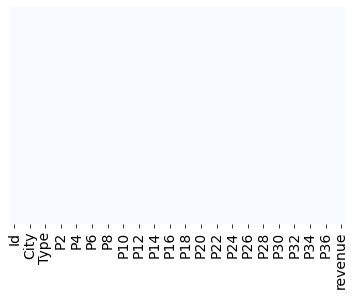

In [11]:
# Check if I have non null values
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

The dataset does NOT contain a missing value

In [12]:
# Using .dtypes() to check data types of the dataset
print(train_df.dtypes)

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object


The dataset has an Integer, a Float and an Object values

In [13]:
# Using .info() to provide a concise summary of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [14]:
# Let's check the count of the dataset
train_df.shape

(137, 43)

In [15]:
# Let's see if there are duplicated entries in the dataset
train_df.duplicated().sum()

0

There are no duplicated entries in the dataset

In [16]:
# Using .describe() to provide full summary statistics
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


* The Standard Deviation of the revenue is 2.576072e+06
* The maximum value of the revenue is 1.969694e+07
* 25% values of the revenue is 2.999068e+06

## ***Let's work with some potential outliers to respond to three questions***

# *Question 1: Provide the dataset with more than 5,000,000 as a Revenue*

In [17]:
# Display a dataset with a Revenue > 5,000,000
train_df[(train_df['revenue'] > 5000000)]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0
11,11,05/22/2012,İstanbul,Big Cities,IL,2,4.0,4.0,4.0,2,5,5,5,5,5,2,5,5.0,2,2,5,2,4,2,5,1,1,3,5,2,3.0,5.0,3.0,3.0,5,5,4,2,3,4,4,2,5161370.0
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,19696939.0
17,17,11/08/2009,İstanbul,Big Cities,FC,2,4.0,4.0,5.0,1,3,5,4,5,5,3,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,8213524.0
18,18,04/21/2012,İzmir,Big Cities,IL,4,5.0,4.0,3.0,1,2,5,5,5,5,2,5,5.0,3,2,3,2,3,4,5,1,4,2,5,3,3.0,3.0,2.0,3.0,3,5,5,4,4,4,3,2,5337526.0
20,20,08/25/2010,Elazığ,Other,IL,3,4.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,3,5,5,4,4,5,5,1,1,5,2,4,1.0,5.0,1.0,3.0,5,1,2,2,4,5,5,4,5525735.0


Answer 1: There are 37 of 137 datasets that represent more than 5,000,000 as a revenue

# *Question 2: For the Descriptive Statistical Analysis, count the feature "City" of the dataset*

In [18]:
# Count the variable of the City
train_df['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

Answer 2: For example as a count, there are:
* 50 İstanbul in the dataset
* 19 Ankara in the dataset
* 04 Antalya in the dataset
* 01 Kastamonu in the dataset

# *Question 3: Show the first 15th rows by extracting the dataset with the columns of 'Id', 'Open Date', 'City', 'City Group', 'Type', and 'revenue' ONLY*

In [19]:
# First 15th rows of the dataset with the columns of 'Id', 'Open Date', 'City', 'City Group', 'Type', 'revenue' ONLY
train_df[['Id', 'Open Date', 'City', 'City Group', 'Type', 'revenue']].head(15)

,Id,Open Date,City,City Group,Type,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2055379.0
3,3,02/02/2012,Tokat,Other,IL,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,4952497.0
9,9,11/16/2011,Edirne,Other,IL,5444227.0


Answer 3: This is the top 15 of the dataset with the features of 'Id', 'Open Date', 'City', 'City Group', 'Type', and 'revenue' ONLY

In [20]:
# Calculating the Median of the feature "Type" considering "IL" only
train_df[(train_df['Type'] == 'IL')].median()

Id              52.5
P1               4.0
P2               5.0
P3               4.0
P4               4.0
P5               2.0
P6               3.0
P7               5.0
P8               5.0
P9               5.0
P10              5.0
P11              3.0
P12              5.0
P13              5.0
P14              3.0
P15              2.5
P16              3.0
P17              2.0
P18              4.0
P19              4.5
P20              5.0
P21              2.0
P22              2.0
P23              3.0
P24              2.5
P25              2.0
P26              3.0
P27              2.0
P28              3.0
P29              3.0
P30              5.0
P31              5.0
P32              4.0
P33              2.0
P34              3.0
P35              4.0
P36              3.0
P37              2.0
revenue    4076087.0
dtype: float64

In [21]:
# Calculating the Variance of the feature "Type" considering "FC" only
train_df[(train_df['Type'] == 'FC')].var()

Id         1.485619e+03
P1         6.168947e+00
P2         1.956491e+00
P3         7.805263e-01
P4         7.538596e-01
P5         1.220351e+00
P6         3.875614e+00
P7         4.298070e+00
P8         2.610526e+00
P9         2.418947e+00
P10        2.362632e+00
P11        3.065789e+00
P12        2.665789e+00
P13        7.731140e-01
P14        3.247368e-01
P15        6.508772e-02
P16        2.603509e-01
P17        6.508772e-02
P18        3.247368e-01
P19        2.173263e+01
P20        1.027649e+01
P21        3.645439e+00
P22        1.551404e+00
P23        1.398228e+01
P24        4.421053e-01
P25        1.305263e-01
P26        1.689474e-01
P27        3.403509e-01
P28        3.882939e+00
P29        2.463289e+00
P30        2.222807e-01
P31        2.222807e-01
P32        2.336842e-01
P33        2.603509e-01
P34        3.247368e-01
P35        2.222807e-01
P36        2.336842e-01
P37        4.421053e-01
revenue    8.986211e+12
dtype: float64

In [22]:
# Calculating the Mean of the feature "revenue" 
train_df['revenue'].mean()

4453532.613138686

The mean value of the revenue is 4453532.61

# ***Visualizations***

In [23]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,4

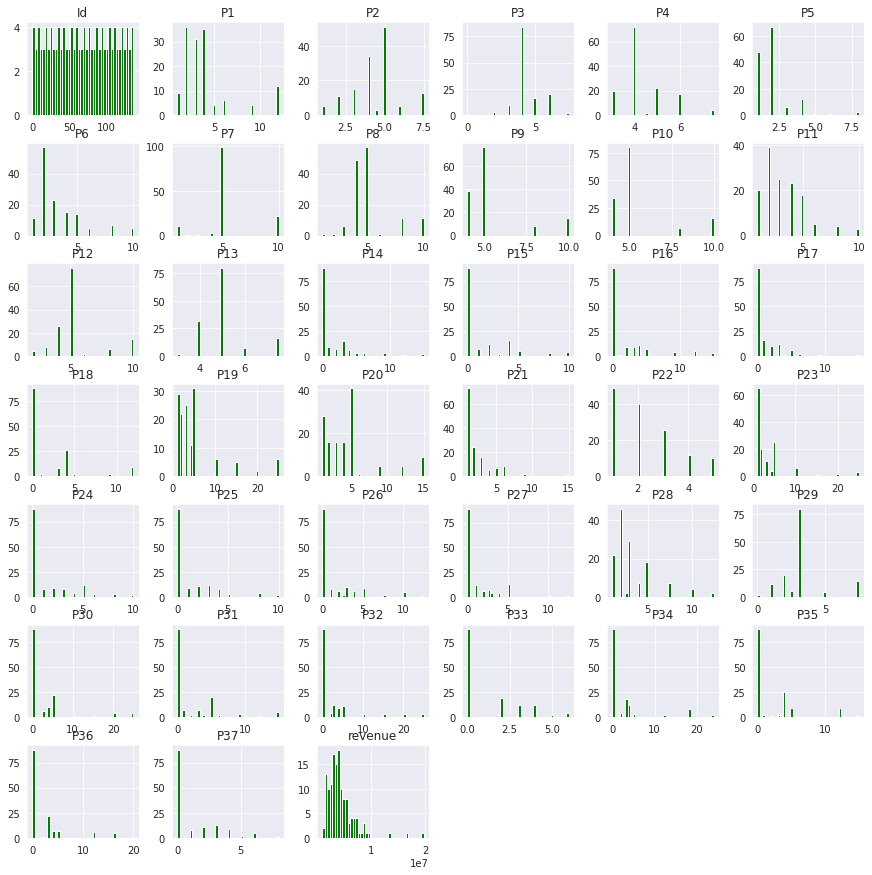

In [24]:
# Histogram of the Dataset
sns.set_style('darkgrid')
train_df.hist(figsize=(15, 15), bins = 40, color = 'Green');

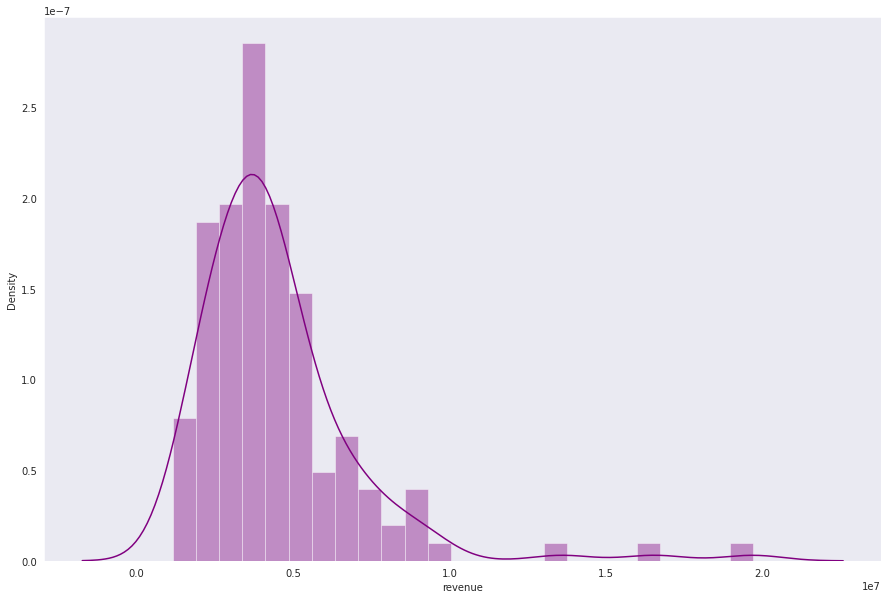

In [25]:
# Plot the distplot for the Revenue
plt.figure(figsize=(15, 10))
sns.distplot(train_df['revenue'], bins = 25, color = 'purple')

plt.grid()

This is the Distribution of the revenue over the time

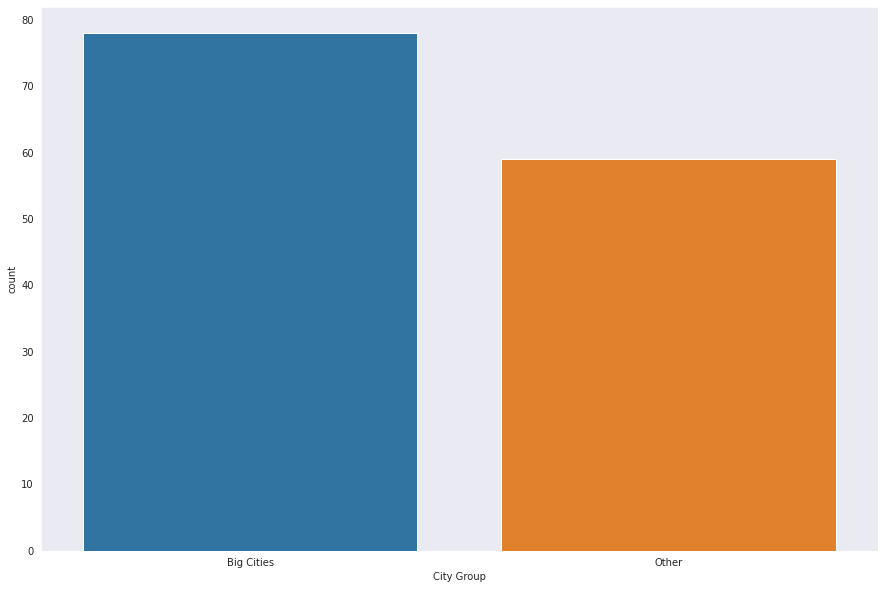

In [26]:
# Let's print out countplot to know how many 'Big Cities' and 'Other' data belong to the feature City Group
plt.figure(figsize=(15, 10))
sns.set_style('dark')
sns.countplot(train_df['City Group'], label = "Count");

In [27]:
Correlation = train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P19', 'P20', 'revenue']].corr()

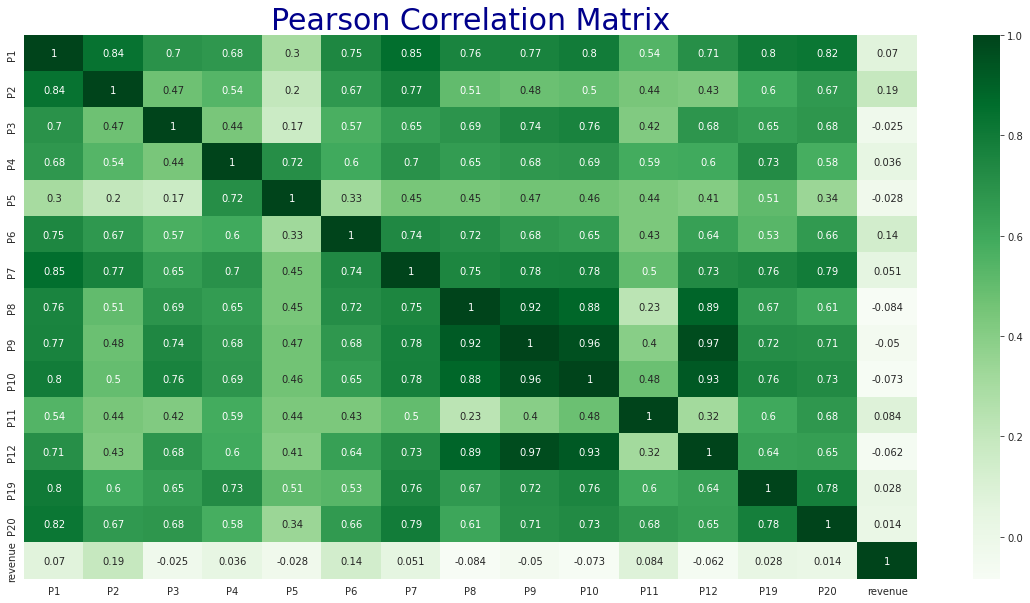

In [28]:
# Correlation Matrix between some of the features (P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P19, P20, revenue) of the dataset
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(Correlation, cmap ='Greens', annot = True)
plt.title('Pearson Correlation Matrix', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

* There is a strong correlation of 0.97 between P9 and P12, which correlation is close to 1, means that there is a large positive relationship.
* There is a strong correlation of 0.96 between P9 and P10, which correlation is close to 1, means that there is a large positive relationship.
* There is a strong correlation of 0.93 between P10 and P12, which correlation is close to 1, means that there is a large positive relationship.

* There is a correlation of -0.025 between P3 and revenue, which correlation is close to 0, means that there is no relationship.
* There is a correlation of -0.028 between P5 and revenue, which correlation is close to 0, means that there is no relationship.
* There is a correlation of -0.062 between P12 and revenue, which correlation is close to 0, means that there is no relationship.

## **II- MODEL DEVELOPMENT**

I am going to calculate the Accuracy Score and the Confusion Matrix of these Supervised Machine Learning:

* Logistic Regression
* Decision Tree
* Support Vector Machines
* Random Forest
* XGBoost

In [29]:
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [30]:
# Let's drop 'Open Date' columns from the dataset
train_df.drop("Open Date", axis = 1, inplace= True)

In [31]:
# Let's drop 'City' columns from the dataset
train_df.drop("City", axis = 1, inplace= True)

In [32]:
# Let's drop 'City Group' columns from the dataset
train_df.drop("City Group", axis = 1, inplace= True)

In [33]:
# Let's drop 'Type' columns from the dataset
train_df.drop("Type", axis = 1, inplace= True)

In [34]:
# Let's check the count
train_df.shape

(137, 39)

# *Splitting the data into Features and Targets (revenue)*

In [35]:
X = train_df.drop(columns = 'revenue', axis=1)

In [36]:
y = train_df['revenue']

In [37]:
print(X)

      Id  P1   P2   P3   P4  P5  P6  P7  ...  P30  P31  P32  P33  P34  P35  P36  P37
0      0   4  5.0  4.0  4.0   2   2   5  ...    5    3    4    5    5    4    3    4
1      1   4  5.0  4.0  4.0   1   2   5  ...    0    0    0    0    0    0    0    0
2      2   2  4.0  2.0  5.0   2   3   5  ...    0    0    0    0    0    0    0    0
3      3   6  4.5  6.0  6.0   4   4  10  ...   25   12   10    6   18   12   12    6
4      4   3  4.0  3.0  4.0   2   2   5  ...    5    1    3    2    3    4    3    3
..   ...  ..  ...  ...  ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
132  132   2  3.0  3.0  5.0   4   2   4  ...    0    0    0    0    0    0    0    0
133  133   4  5.0  4.0  4.0   2   3   5  ...    0    0    0    0    0    0    0    0
134  134   3  4.0  4.0  4.0   2   3   5  ...    0    0    0    0    0    0    0    0
135  135   4  5.0  4.0  5.0   2   2   5  ...    0    0    0    0    0    0    0    0
136  136   4  5.0  3.0  5.0   2   2   5  ...    0    0    0    0 

In [38]:
print(y)

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64


# *Split the data into Training data and Testing data*

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Let's split my train (80%) and test (20%) data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(137, 38) (95, 38) (42, 38)


# *Model Training and Model Evaluation*

* *Logistic Regression*

In [42]:
model = LogisticRegression()

In [43]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)

In [45]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [46]:
print('Accuracy Score of the Logistic Regression on Training Data:', training_data_accuracy)

Accuracy Score of the Logistic Regression on Training Data: 1.0


In [47]:
#Predict and score the model
y_test_prediction = model.predict(X_test)
"R-squared score of the Logistic Regression model on Test Data was {}.".format(r2_score(y_test, y_test_prediction), len(y_test))

'R-squared score of the Logistic Regression model on Test Data was -0.3594897101086121.'

* *Decision Tree*

In [48]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [49]:
# Training the Decision Tree Model with Training Data
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
# Accuracy on training data
X_train_prediction = DT.predict(X_train)

In [51]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [52]:
print('Accuracy Score of the Decision Tree model on Training Data:', training_data_accuracy)

Accuracy Score of the Decision Tree model on Training Data: 0.16842105263157894


In [53]:
#Predict and score the model
y_test_prediction = DT.predict(X_test)
"R-squared score of the Decision Tree model on Test Data was {}.".format(r2_score(y_test, y_test_prediction), len(y_test))

'R-squared score of the Decision Tree model on Test Data was -0.49913959911657635.'

* *Support Vector Machines*

In [54]:
svm = SVC()

In [55]:
# Training the Support Vector Machines Model with Training Data
svm.fit(X_train, y_train)

SVC()

In [56]:
# Accuracy on training data
X_train_prediction = svm.predict(X_train)

In [57]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [58]:
print('Accuracy Score of the Support Vector Machines model on Training Data:', training_data_accuracy)

Accuracy Score of the Support Vector Machines model on Training Data: 1.0


In [59]:
#Predict and score the model
y_test_prediction = svm.predict(X_test)
"R-squared score of the Support Vector Machines model on Test Data was {}.".format(r2_score(y_test, y_test_prediction), len(y_test))

'R-squared score of the Support Vector Machines model on Test Data was -0.03260285700632415.'

* *Random Forest*

In [60]:
rf = RandomForestClassifier(max_depth = 4)

In [61]:
# Training the Random Forest Model with Training Data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [62]:
# Accuracy on training data
X_train_prediction = rf.predict(X_train)

In [63]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [64]:
print('Accuracy Score of the Random Forest model on Training Data:', training_data_accuracy)

Accuracy Score of the Random Forest model on Training Data: 0.9789473684210527


In [65]:
#Predict and score the model
y_test_prediction = rf.predict(X_test)
"R-squared score of the Random Forest model on Test Data was {}.".format(r2_score(y_test, y_test_prediction), len(y_test))

'R-squared score of the Random Forest model on Test Data was -0.41646264071232975.'

* *XGBoost*

In [66]:
xgb = XGBClassifier(max_depth = 4)

In [67]:
# Training the XGBoost Model with Training Data
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=4, objective='multi:softprob')

In [68]:
# Accuracy on training data
X_train_prediction = xgb.predict(X_train)

In [69]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [70]:
print('Accuracy Score of the XGBoost model on Training Data:', training_data_accuracy)

Accuracy Score of the XGBoost model on Training Data: 0.010526315789473684


In [71]:
#Predict and score the model
y_test_prediction = xgb.predict(X_test)
"R-squared score of the XGBoost model on Test Data was {}.".format(r2_score(y_test, y_test_prediction), len(y_test))

'R-squared score of the XGBoost model on Test Data was -1.3706708558712064.'

***Conclusion***

I've received 100% Accuracy Score on Training data and -3.26% R-Squared Score on Test data in my "Predict Restaurant Revenue"; this means that:

* Logistic Regression and Support Vector Machines are the WINNERS, since they represent the highest score. 
* In term of an accuracy score of the training data, both have the same score of 1.0 and in term of the R-Squared score on test data, Support Vector Machines scored -0.03260285700632415 and Logistic Regression scored -0.3594897101086121.